Exploratory Data Analysis (EDA)

In [19]:
import pandas as pd
# loaded the glass dataset
df = pd.read_excel('glass_actual.xlsx')

# Display the first few rows
print("First 5 rows of the dataframe:")
display(df.head())

# Get summary statistics
print("\nSummary statistics of the dataframe:")
display(df.describe())

# Check for missing values
print("\nMissing values in each column:")
display(df.isnull().sum())

# Get information about the dataframe (data types, non-null counts, etc.)
print("\nInformation about the dataframe:")
df.info()

# Check for unique values in the 'Type' column
print("\nUnique values in the 'Type' column:")
display(df['Type'].unique())

# Check the value counts for the 'Type' column
print("\nValue counts for the 'Type' column:")
display(df['Type'].value_counts())

First 5 rows of the dataframe:


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,build wind float
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,vehic wind float
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,build wind float
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,tableware
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,build wind non-float



Summary statistics of the dataframe:


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000



Missing values in each column:


,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0



Information about the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB

Unique values in the 'Type' column:


array(['build wind float', 'vehic wind float', 'tableware',
       'build wind non-float', 'headlamps', 'containers'], dtype=object)


Value counts for the 'Type' column:


,count
Type,
build wind non-float,76
build wind float,70
headlamps,29
vehic wind float,17
containers,13
tableware,9


Data Visuvalization

Histograms of numerical features:


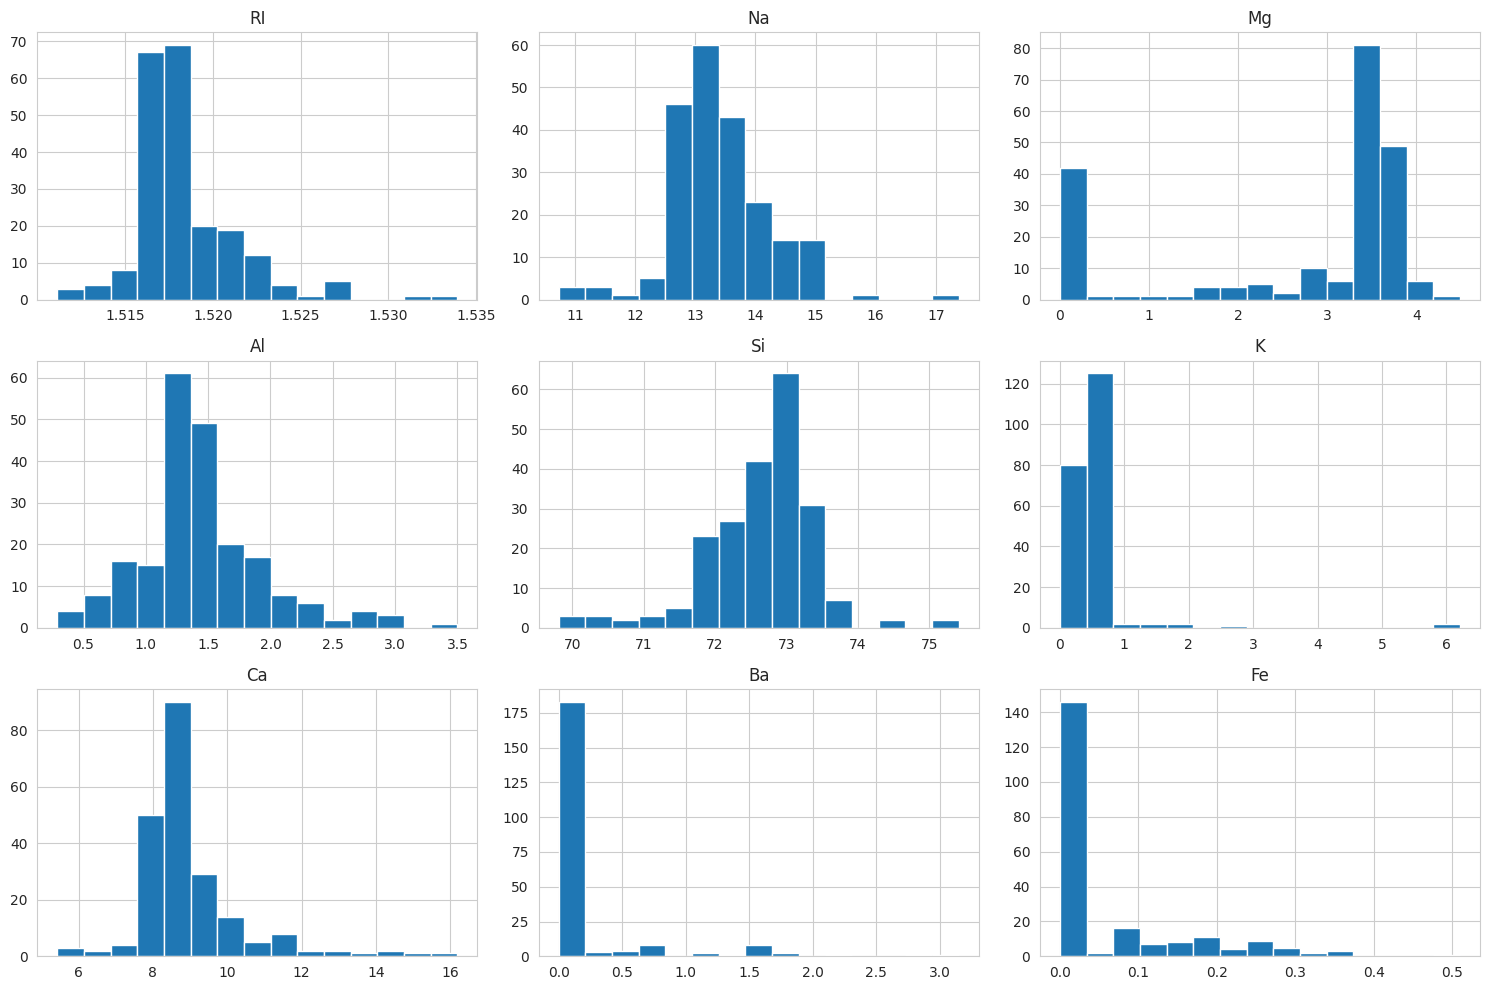


Countplot of 'Type' column:


/tmp/ipython-input-3115490748.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Type', order = df['Type'].value_counts().index, palette='viridis')


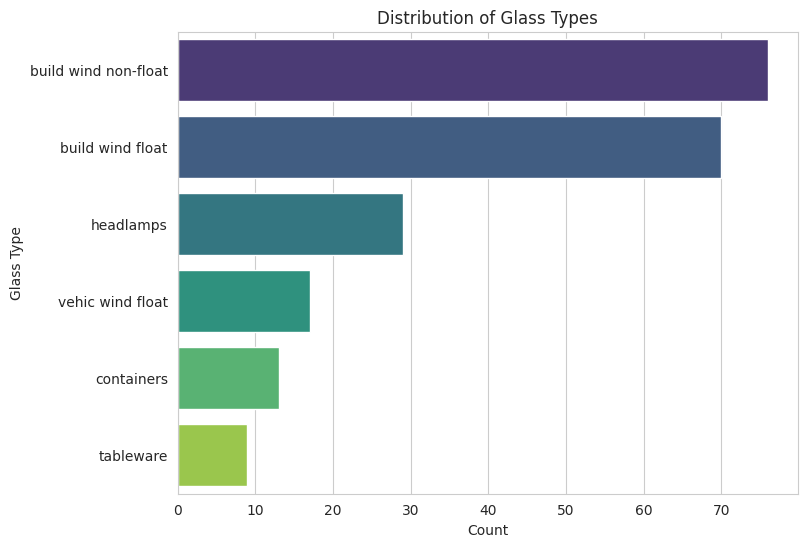

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

# Get the numerical columns (excluding 'Type')
numerical_cols = df.select_dtypes(include='number').columns

# Create histograms for numerical features
print("Histograms of numerical features:")
df[numerical_cols].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Create a countplot for the 'Type' column
print("\nCountplot of 'Type' column:")
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='Type', order = df['Type'].value_counts().index, palette='viridis')
plt.title('Distribution of Glass Types')
plt.xlabel('Count')
plt.ylabel('Glass Type')
plt.show()


Pair plot of numerical features:


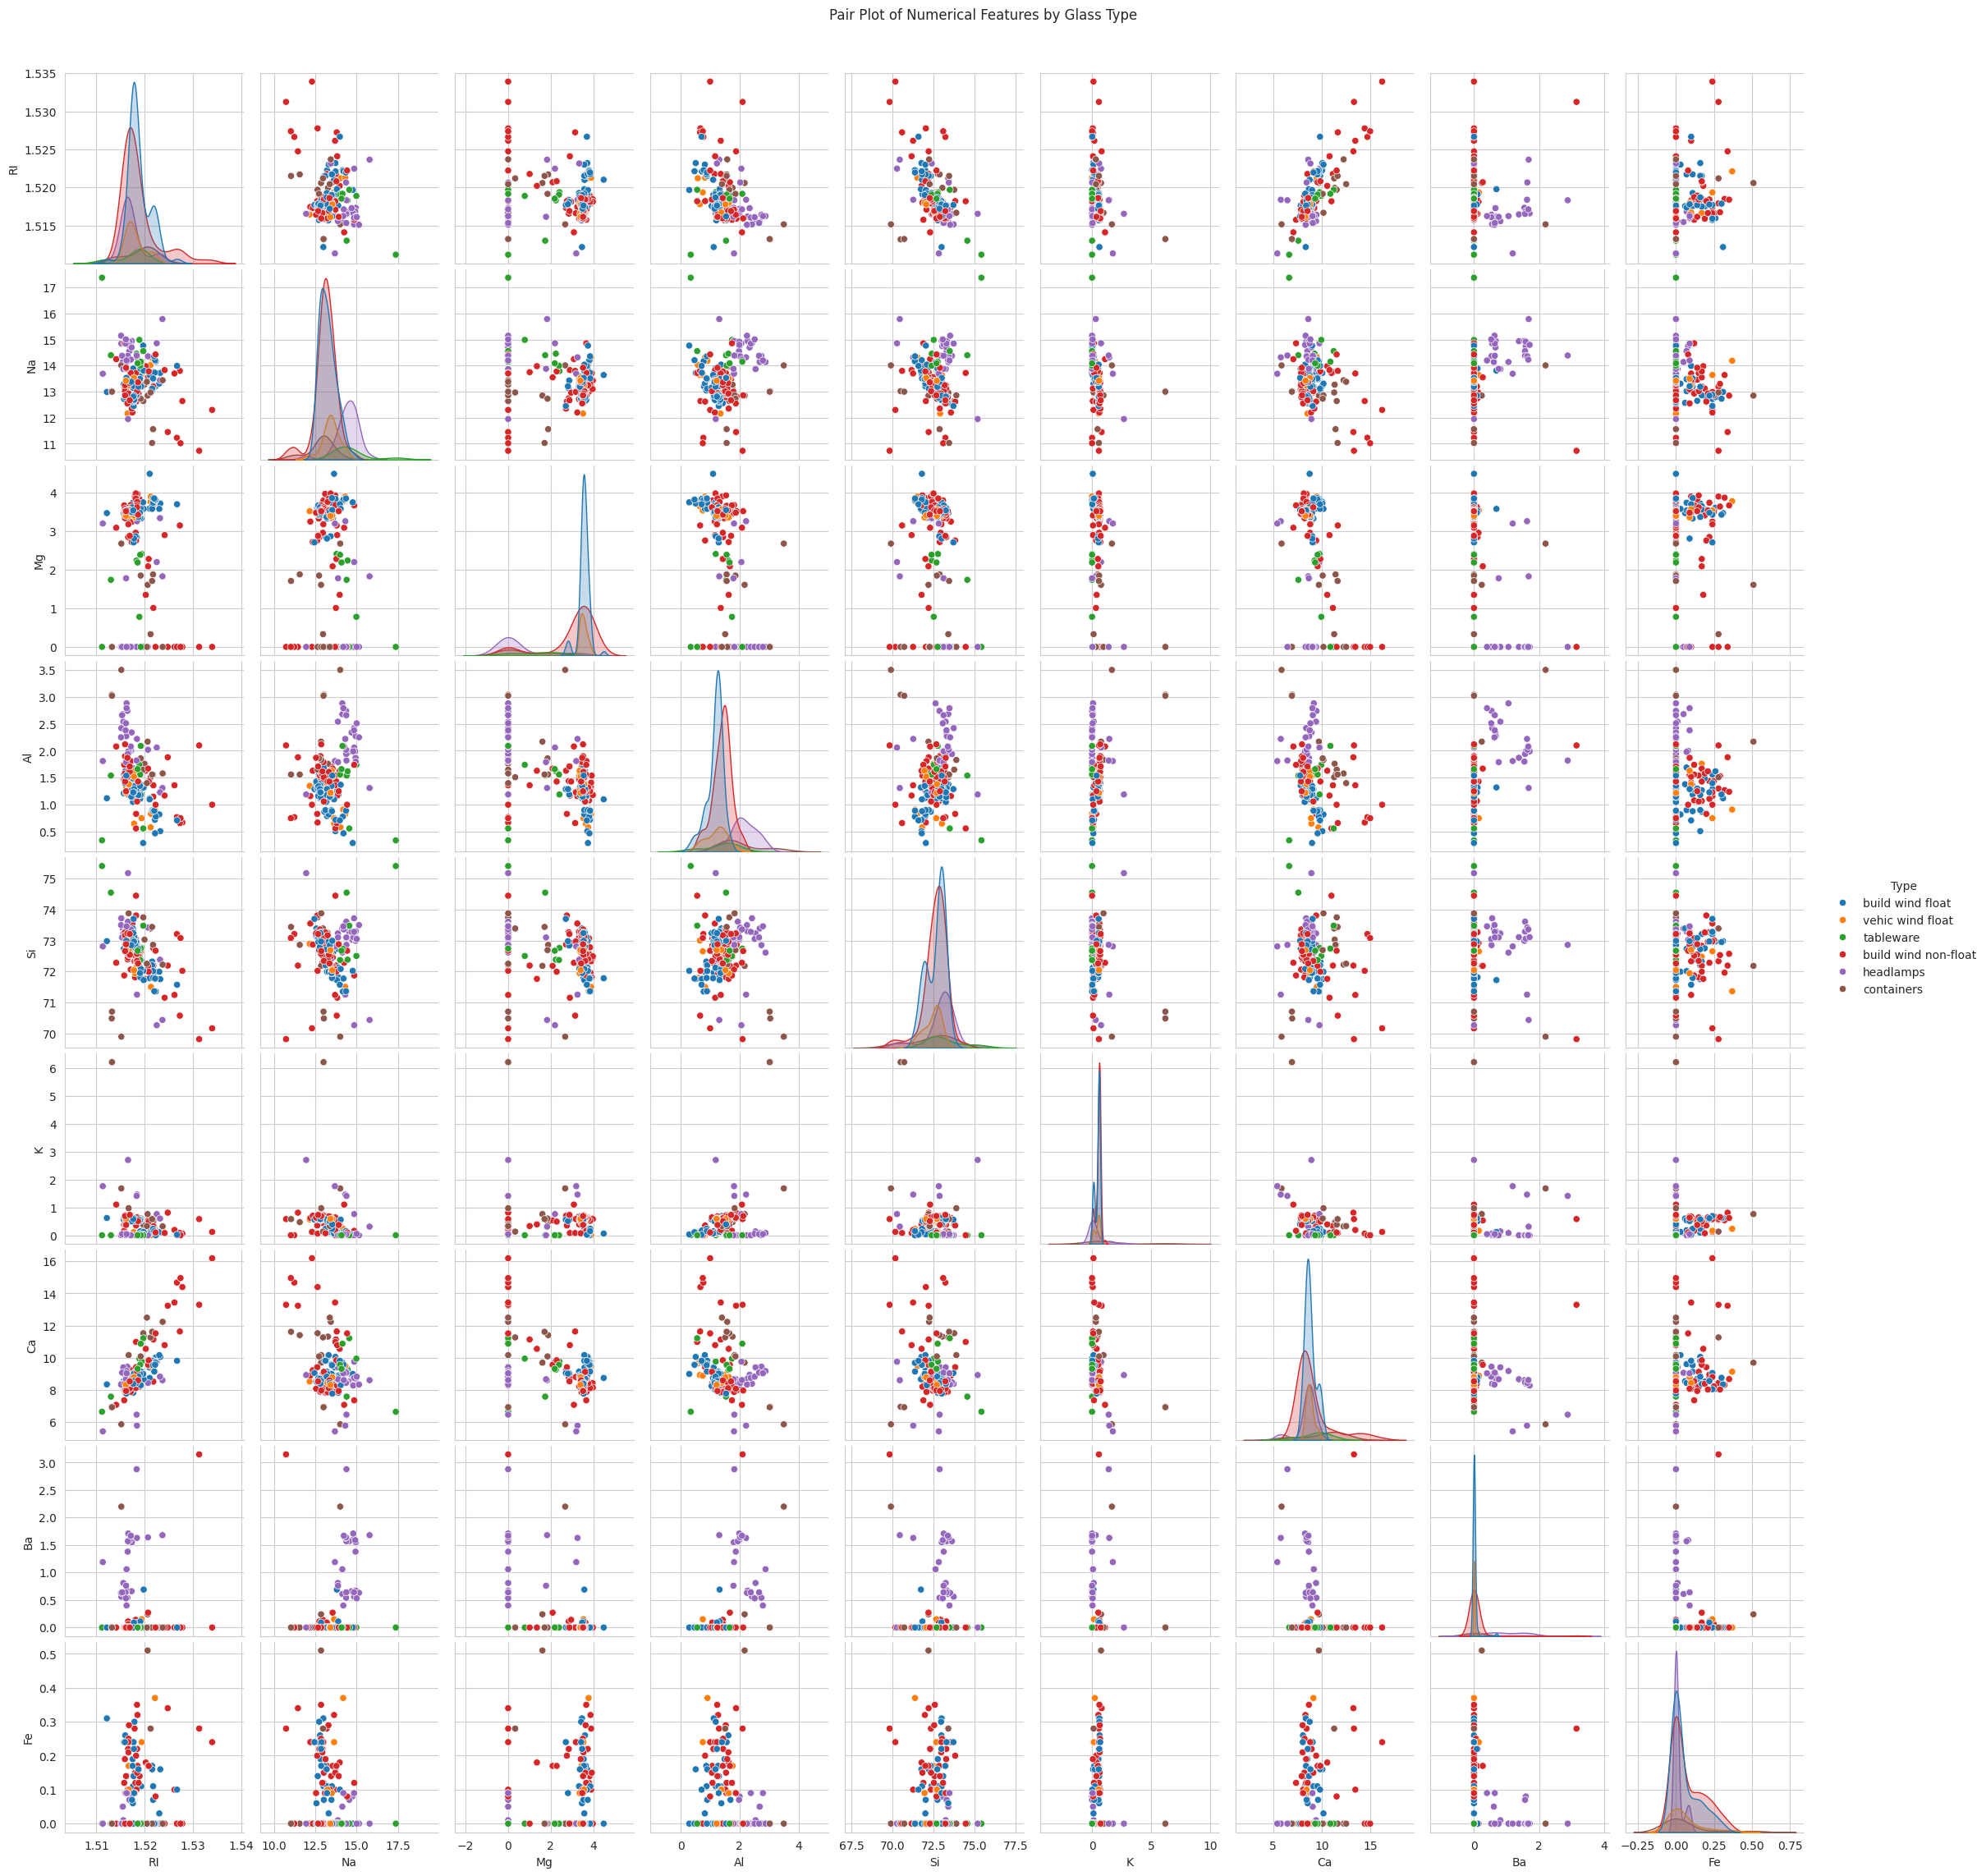

In [21]:
# Create a pair plot for numerical features
print("\nPair plot of numerical features:")
sns.pairplot(df[numerical_cols.tolist() + ['Type']], hue='Type')
plt.suptitle('Pair Plot of Numerical Features by Glass Type', y=1.02)
plt.show()

Data Preprocessing

In [22]:
# Apply one-hot encoding to the 'Type' column
df_encoded = pd.get_dummies(df, columns=['Type'], drop_first=True)

# Display the first few rows of the encoded dataframe
print("First 5 rows of the dataframe after one-hot encoding:")
display(df_encoded.head())

First 5 rows of the dataframe after one-hot encoding:


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_build wind non-float,Type_containers,Type_headlamps,Type_tableware,Type_vehic wind float
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,False,False,False,False,False
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,False,False,False,False,True
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,False,False,False,False,False
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,False,False,False,True,False
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,True,False,False,False,False


In [24]:
# performing standardization
from sklearn.preprocessing import StandardScaler

# Select the numerical columns for scaling (excluding the encoded 'Type' columns)
numerical_cols_scaled = df_encoded.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standardization to the numerical columns
df_encoded[numerical_cols_scaled] = scaler.fit_transform(df_encoded[numerical_cols_scaled])

# Display the first few rows of the scaled dataframe
print("First 5 rows of the dataframe after standardization:")
display(df_encoded.head())

First 5 rows of the dataframe after standardization:


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_build wind non-float,Type_containers,Type_headlamps,Type_tableware,Type_vehic wind float
0,-0.143715,-0.758384,0.566677,-0.652289,0.490551,0.219689,-0.131680,-0.352877,-0.586451,False,False,False,False,False
1,-0.638803,-1.531681,0.580575,-0.190536,0.309376,0.112107,-0.300715,-0.352877,-0.586451,False,False,False,False,True
2,-0.143715,-0.242853,0.552779,-0.070079,-0.014151,0.142844,-0.371146,-0.352877,-0.586451,False,False,False,False,False
3,-1.774207,1.217820,-0.656366,0.190912,2.457593,-0.763919,-0.962769,-0.352877,-0.586451,False,False,False,True,False
4,5.137232,-1.359837,-1.865511,-0.893204,-3.223534,-0.579492,5.094318,-0.352877,1.882411,True,False,False,False,False


Random Forest Model Implementation

In [25]:
# splitting the trianing and testing dataset
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
# The target variable 'Type' was one-hot encoded, so we need to select the original 'Type' column from the original df for the labels
X = df_encoded.drop(columns=[col for col in df_encoded.columns if col.startswith('Type_')])
y = df['Type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (171, 9) (171,)
Testing set shape (X_test, y_test): (43, 9) (43,)


In [26]:
# Implement a Random Forest classifier using Python and a machine learning library like scikit-learn.
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully.")

Random Forest model trained successfully.


In [27]:
# Evaluate the performance on test data using metrics like accuracy, precision, recall, and F1-score.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (weighted): {precision:.4f}")
print(f"Recall (weighted): {recall:.4f}")
print(f"F1-score (weighted): {f1:.4f}")

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display confusion matrix
print("\nConfusion Matrix:")
display(pd.DataFrame(confusion_matrix(y_test, y_pred), index=rf_model.classes_, columns=rf_model.classes_))

Accuracy: 0.8140
Precision (weighted): 0.8562
Recall (weighted): 0.8140
F1-score (weighted): 0.8050

Classification Report:
                      precision    recall  f1-score   support

    build wind float       0.74      1.00      0.85        14
build wind non-float       1.00      0.73      0.85        15
          containers       1.00      0.67      0.80         3
           headlamps       0.75      1.00      0.86         6
           tableware       0.50      0.50      0.50         2
    vehic wind float       1.00      0.33      0.50         3

            accuracy                           0.81        43
           macro avg       0.83      0.71      0.73        43
        weighted avg       0.86      0.81      0.80        43


Confusion Matrix:


,build wind float,build wind non-float,containers,headlamps,tableware,vehic wind float
build wind float,14,0,0,0,0,0
build wind non-float,3,11,0,0,1,0
containers,0,0,2,1,0,0
headlamps,0,0,0,6,0,0
tableware,0,0,0,1,1,0
vehic wind float,2,0,0,0,0,1


Bagging and Boosting Methods

In [28]:
# Applying the Bagging Method
from sklearn.ensemble import BaggingClassifier

# Initialize the Bagging Classifier
bagging_model = BaggingClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
bagging_model.fit(X_train, y_train)

print("Bagging model trained successfully.")

Bagging model trained successfully.


In [29]:
# Make predictions on the test data
y_pred_bagging = bagging_model.predict(X_test)

# Evaluate the model
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
precision_bagging = precision_score(y_test, y_pred_bagging, average='weighted')
recall_bagging = recall_score(y_test, y_pred_bagging, average='weighted')
f1_bagging = f1_score(y_test, y_pred_bagging, average='weighted')

print(f"Bagging Model Accuracy: {accuracy_bagging:.4f}")
print(f"Bagging Model Precision (weighted): {precision_bagging:.4f}")
print(f"Bagging Model Recall (weighted): {recall_bagging:.4f}")
print(f"Bagging Model F1-score (weighted): {f1_bagging:.4f}")

# Display classification report
print("\nBagging Model Classification Report:")
print(classification_report(y_test, y_pred_bagging))

# Display confusion matrix
print("\nBagging Model Confusion Matrix:")
display(pd.DataFrame(confusion_matrix(y_test, y_pred_bagging), index=bagging_model.classes_, columns=bagging_model.classes_))

Bagging Model Accuracy: 0.8140
Bagging Model Precision (weighted): 0.8454
Bagging Model Recall (weighted): 0.8140
Bagging Model F1-score (weighted): 0.8136

Bagging Model Classification Report:
                      precision    recall  f1-score   support

    build wind float       0.81      0.93      0.87        14
build wind non-float       1.00      0.67      0.80        15
          containers       0.67      0.67      0.67         3
           headlamps       0.86      1.00      0.92         6
           tableware       0.67      1.00      0.80         2
    vehic wind float       0.50      0.67      0.57         3

            accuracy                           0.81        43
           macro avg       0.75      0.82      0.77        43
        weighted avg       0.85      0.81      0.81        43


Bagging Model Confusion Matrix:


,build wind float,build wind non-float,containers,headlamps,tableware,vehic wind float
build wind float,13,0,0,0,0,1
build wind non-float,2,10,1,0,1,1
containers,0,0,2,1,0,0
headlamps,0,0,0,6,0,0
tableware,0,0,0,0,2,0
vehic wind float,1,0,0,0,0,2


In [30]:
# Applying the Boosting Method
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
# Using default parameters for now
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model on the training data
gb_model.fit(X_train, y_train)

print("Gradient Boosting model trained successfully.")

Gradient Boosting model trained successfully.


In [31]:
# Make predictions on the test data using the Gradient Boosting model
y_pred_gb = gb_model.predict(X_test)

# Evaluate the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')

print(f"Gradient Boosting Model Accuracy: {accuracy_gb:.4f}")
print(f"Gradient Boosting Model Precision (weighted): {precision_gb:.4f}")
print(f"Gradient Boosting Model Recall (weighted): {recall_gb:.4f}")
print(f"Gradient Boosting Model F1-score (weighted): {f1_gb:.4f}")

# Display classification report for Gradient Boosting model
print("\nGradient Boosting Model Classification Report:")
print(classification_report(y_test, y_pred_gb))

# Display confusion matrix for Gradient Boosting model
print("\nGradient Boosting Model Confusion Matrix:")
display(pd.DataFrame(confusion_matrix(y_test, y_pred_gb), index=gb_model.classes_, columns=gb_model.classes_))

Gradient Boosting Model Accuracy: 0.7209
Gradient Boosting Model Precision (weighted): 0.7305
Gradient Boosting Model Recall (weighted): 0.7209
Gradient Boosting Model F1-score (weighted): 0.7090

Gradient Boosting Model Classification Report:
                      precision    recall  f1-score   support

    build wind float       0.69      0.79      0.73        14
build wind non-float       0.79      0.73      0.76        15
          containers       1.00      0.33      0.50         3
           headlamps       0.75      1.00      0.86         6
           tableware       0.50      0.50      0.50         2
    vehic wind float       0.50      0.33      0.40         3

            accuracy                           0.72        43
           macro avg       0.70      0.61      0.62        43
        weighted avg       0.73      0.72      0.71        43


Gradient Boosting Model Confusion Matrix:


,build wind float,build wind non-float,containers,headlamps,tableware,vehic wind float
build wind float,11,2,0,0,0,1
build wind non-float,3,11,0,0,1,0
containers,0,1,1,1,0,0
headlamps,0,0,0,6,0,0
tableware,0,0,0,1,1,0
vehic wind float,2,0,0,0,0,1


In [32]:
# comaring the bagging and boosting results
# Create a dictionary to store the performance metrics for each model
performance_metrics = {
    'Random Forest': {
        'Accuracy': accuracy,
        'Precision (weighted)': precision,
        'Recall (weighted)': recall,
        'F1-score (weighted)': f1
    },
    'Bagging': {
        'Accuracy': accuracy_bagging,
        'Precision (weighted)': precision_bagging,
        'Recall (weighted)': recall_bagging,
        'F1-score (weighted)': f1_bagging
    },
    'Gradient Boosting': {
        'Accuracy': accuracy_gb,
        'Precision (weighted)': precision_gb,
        'Recall (weighted)': recall_gb,
        'F1-score (weighted)': f1_gb
    }
}

# Display the performance metrics in a DataFrame for easy comparison
performance_df = pd.DataFrame(performance_metrics).T
print("Performance Comparison of Models:")
display(performance_df)

# Identify the best performing model for each metric
print("\nBest performing model for each metric:")
for metric in performance_df.columns:
    best_model = performance_df[metric].idxmax()
    best_score = performance_df[metric].max()
    print(f"{metric}: {best_model} ({best_score:.4f})")

# Discussion of potential reasons for performance differences
print("\nDiscussion of potential reasons for performance differences:")
print("Random Forest (Bagging with feature randomness): Generally performs well, robust to overfitting.")
print("Bagging: Reduces variance by averaging predictions from multiple models, effective in reducing overfitting.")
print("Gradient Boosting: Builds models sequentially, correcting errors of previous models; can achieve high accuracy but might be prone to overfitting if not tuned properly.")

Performance Comparison of Models:


,Accuracy,Precision (weighted),Recall (weighted),F1-score (weighted)
Random Forest,0.813953,0.856181,0.813953,0.804976
Bagging,0.813953,0.845377,0.813953,0.813630
Gradient Boosting,0.720930,0.730482,0.720930,0.709043



Best performing model for each metric:
Accuracy: Random Forest (0.8140)
Precision (weighted): Random Forest (0.8562)
Recall (weighted): Random Forest (0.8140)
F1-score (weighted): Bagging (0.8136)

Discussion of potential reasons for performance differences:
Random Forest (Bagging with feature randomness): Generally performs well, robust to overfitting.
Bagging: Reduces variance by averaging predictions from multiple models, effective in reducing overfitting.
Gradient Boosting: Builds models sequentially, correcting errors of previous models; can achieve high accuracy but might be prone to overfitting if not tuned properly.


1. Explain Bagging and Boosting methods. How is it different from each other.
  
  Bagging and Boosting are both ensemble techniques, but they work differently.

**Bagging (Bootstrap Aggregating)**:
It builds multiple models independently on different bootstrap samples of the data and then aggregates their predictions, usually by majority vote or averaging. The idea is to reduce variance and avoid overfitting. A common example is Random Forest.

**Boosting**:
It builds models sequentially. Each new model focuses on correcting the mistakes of the previous ones by giving higher weight to misclassified data points. This reduces both bias and variance and generally achieves higher accuracy. Examples are AdaBoost, Gradient Boosting, XGBoost.

2. Explain how to handle imbalance in the data.

When data is imbalanced, the model tends to favor the majority class. To handle it, we can use three approaches:

**Data-level techniques**:

Oversample the minority class (e.g., SMOTE)

Undersample the majority class

Or combine both.

**Algorithm-level techniques**:

Use algorithms that support class weights so that errors on the minority class are penalized more.

Use specialized methods like Balanced Random Forest or set parameters like scale_pos_weight in XGBoost.

**Evaluation-level techniques**:

Accuracy is misleading on imbalanced data. Instead, use metrics like Precision, Recall, F1-score, ROC-AUC, Precision-Recall AUC.